

> Make Source Images



In [ ]:
!pip install git+https://gitlab.com/obuilds/public/pytube@ob-v1 --upgrade

  Cloning https://gitlab.com/obuilds/public/pytube (to revision ob-v1) to /tmp/pip-req-build-8yb4qng9
  Running command git clone -q https://gitlab.com/obuilds/public/pytube /tmp/pip-req-build-8yb4qng9
  Running command git checkout -q 10c57109f87fe864d8f38bbc8d76941e695de93a
  Created wheel for pytube3: filename=pytube3-9.6.4-cp36-none-any.whl size=38549 sha256=d50e8e40d5556f6c49a6b7dcc95f3052ec2732e06fe1d915942092df38d83a72
  Stored in directory: /tmp/pip-ephem-wheel-cache-ybexvdht/wheels/94/1b/9d/b812d655a1f84514e2b91fc9c3d023b35c5067906b396e153e
Successfully built pytube3


In [ ]:
!pip install yacs

In [1]:
import os
from os.path import exists, join, basename, splitext

In [2]:
git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

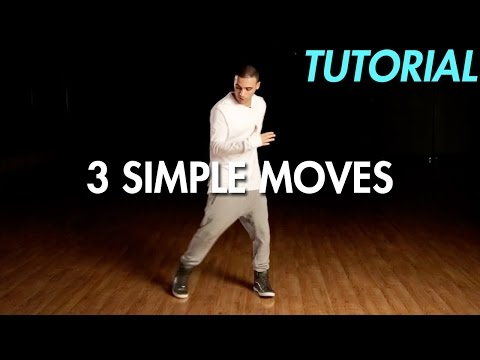

In [3]:
id='ujREEgxEP7g'
YouTubeVideo(id)

In [5]:
#from youtube
!rm -rf youtube.mp4
# download from youtube
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$id
# cut first 5 secs
!ffmpeg -y -loglevel info -i youtube.mp4 -ss 00:01:48 -to 00:01:53 video.mp4

[youtube] ujREEgxEP7g: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 35.03MiB in 00:00
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis 

Detect Pose

In [6]:
!rm openpose.avi
#not from youtube
#!cd openpose && ./build/examples/openpose/openpose.bin --video "../drive/My Drive/DL course project/vishwesh_input_new.mp4" --disable_blending true --write_json ./output/ --display 0  --write_video ../openpose.avi 
#From youtube
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --disable_blending true --write_json ./output/ --display 0  --write_video ../openpose.avi 
# convert to mp4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

rm: cannot remove 'openpose.avi': No such file or directory
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 36.684008 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-li

Visualize Result

In [7]:
import io
import base64
from IPython.display import HTML

def show_local_mp4_video(file_name, width=640, height=480):
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [ ]:
#OPTIONAL
#convert video to images
#os.chdir("/content/drive/My\ Drive/Pose2Pose/")
!ffmpeg -i ./output.mp4 ./raghav_input/pose%06d.jpg -hide_banner
# !ffmpeg -i ./Training_data.mp4 img%06d.jpg -hide_banner

#these images need to be transferred to main code directory in ./project/datasets where pose will go to Train_A and image will go to Train_B directory
#some images can be transferred to Test_A and Test_B

In [8]:
#download

#video
from google.colab import files
files.download('./video.mp4')

#output
from google.colab import files
files.download('./output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training

In [ ]:
!git clone https://github.com/Vishwesh4/Everybody-dance-now.git

In [23]:
%cd /content/Everybody-dance-now/config/

/content/Everybody-dance-now/config


In [24]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path

%matplotlib inline

In [ ]:
#importing training options
#os.chdir("../")
import config.train_opt as opt

In [26]:
pix2pixhd_dir = Path('./src/pix2pixHD/')

import sys
sys.path.append(str(pix2pixhd_dir))

%load_ext autoreload
%autoreload 2

In [ ]:
# from options.train_options import TrainOptions
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer

In [ ]:

with open('./config/train_opt.pkl', mode='rb') as f:
     opt = pickle.load(f)

iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [ ]:
#tuning parameters
opt.dataroot="./dataset_test"
#18
opt.label_nc=0
opt.fp16=False
#avoid overwriting in checkpoints folder
opt.name="Pose_Game_test"
opt.load_pretrain="./checkpoints/Pose_Game/"
#opt.isTrain = False
opt.checkpoints_dir="./checkpoints/"
#opt.use_encoded_image = True

In [ ]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)
    
start_epoch, epoch_iter=1, 0
total_steps=(start_epoch-1) * dataset_size + epoch_iter
display_delta=total_steps % opt.display_freq
print_delta=total_steps % opt.print_freq
save_delta=total_steps % opt.save_latest_freq

In [ ]:
#for Visualization purposes
fig = plt.figure(figsize = [13,20])
for i,temp in enumerate(dataset):
    #Pose
    plt.subplot(5,2,i*2+1)
    plt.title("Pose")
    plt.imshow(temp['label'][0].permute(1,2,0))
    
    #Image
    plt.subplot(5,2,(i+1)*2)
    plt.title("Image")
    plt.imshow(temp['image'][0].permute(1,2,0))

    if i==4:
        break
plt.show()

In [ ]:
opt.isTrain=True
opt.use_encoded_image=True

model = create_model(opt)
visualizer = Visualizer(opt)

In [ ]:
epoch=1
i=0
for data in tqdm(dataset):
    iter_start_time = time.time()
    total_steps+=1
    epoch_iter+=1

    #forward pass
    losses, generated = model(Variable(data['label']), Variable(data['inst']), 
        Variable(data['image']), Variable(data['feat']), infer=True)

    #sum per device losses
    losses = [ torch.mean(x) if not isinstance(x, int) else x for x in losses ]
    loss_dict = dict(zip(model.module.loss_names, losses))

    # calculate final loss scalar
    loss_D = (loss_dict['D_fake'] + loss_dict['D_real']) * 0.5
    loss_G = loss_dict['G_GAN'] + loss_dict.get('G_GAN_Feat',0) + loss_dict.get('G_VGG',0)


    #results and errors
    ### print errors
    errors = {k: v.item() if not isinstance(v, int) else v for k, v in loss_dict.items()}
    t = (time.time() - iter_start_time) / opt.batchSize
    visualizer.print_current_errors(epoch, epoch_iter, errors, t)
    visualizer.plot_current_errors(errors, total_steps)

    #output images
    visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                           ('synthesized_image', util.tensor2im(generated.data[0])),
                           ('real_image', util.tensor2im(data['image'][0]))])
    visualizer.display_current_results(visuals, i, total_steps)

    #error             
    np.savetxt(iter_path, (epoch, epoch_iter), delimiter=',', fmt='%d')
    i+=1


torch.cuda.empty_cache()

In [ ]:
#vis train loss
#initially:  G_GAN_Feat: 15.700 D_real: 4.131 G_GAN: 4.203 G_VGG: 7.186 D_fake: 2.581 
G_gan_feat = 0
G_gan = 0
D_fake = 0
D_real = 0
G_vgg = 0
iters = 0
with open("./checkpoints/Pose_Game_test/loss_log.txt") as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if "G_GAN_Feat:" in line.split():
            A = line.split()
            G_gan_feat+=(float(A[7]))
            G_vgg+=(float(A[9]))
            G_gan+=(float(A[11]))
            D_fake+=(float(A[13]))
            D_real+=(float(A[15]))
            iters = int(A[3][:-1]) 
        line = fp.readline()
        cnt += 1
print("Test results on {} samples\nG_gan_feat:{}\nG_vgg:{}\nG_gan:{}\nD_fake:{}\nD_real:{}".format(iters,G_gan_feat/iters,G_vgg/iters,G_gan/iters,D_fake/iters,D_real/iters))

# Pose Transfer

In [ ]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer
from util import html

In [ ]:
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')
opt.dataroot

In [ ]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
visualizer = Visualizer(opt)
# create website
web_dir = os.path.join(opt.results_dir, opt.name, '%s_%s' % (opt.phase, opt.which_epoch))
webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.which_epoch))

In [ ]:
fig = plt.figure(figsize = [13,20])
for i,temp in enumerate(dataset):
    #Pose
    plt.subplot(5,1,i+1)
    plt.title("Pose")
    plt.imshow(temp['label'][0].permute(1,2,0))

    if i==4:
        break
plt.show()

In [ ]:
model = create_model(opt)

In [ ]:
for data in tqdm(dataset):
    minibatch = 1 
    generated = model.inference(data['label'], data['inst'])
        
    visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                           ('synthesized_image', util.tensor2im(generated.data[0]))])
    img_path = data['path']
    visualizer.save_images(webpage, visuals, img_path)
webpage.save()
torch.cuda.empty_cache()

To Do: <br>


*   pix2pixHD (Done)
*   CGAN-pix2pix Pipeline
*   Temporal Smoothing

